In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
# 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

In [2]:
# 로이터데이터셋 불러오기 
(X_train, Y_train), (X_test, Y_test) = \
                reuters.load_data(num_words=1000, test_split=0.2)
# num_words = 각 기사별로 단어의 빈도수를 측정해 상위 1000개만 가져오겠다

D:\Anaconda\envs\ML2\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anaconda\envs\ML2\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)

In [5]:
print(Y_train[0])

3


In [6]:
model = Sequential()
model.add(Embedding(1000, 100)) # 1000차원이 들어오는걸 100차원으로 벡터화
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         100000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 46)                4646      
Total params: 185,046
Trainable params: 185,046
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

In [9]:
# 훈련
history = model.fit(x_train, y_train, batch_size=100, \
                       epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 12s 113ms/step - loss: 2.5933 - accuracy: 0.3486 - val_loss: 2.2247 - val_accuracy: 0.4786
Epoch 2/20
90/90 [==============================] - 10s 107ms/step - loss: 2.0623 - accuracy: 0.4890 - val_loss: 2.0451 - val_accuracy: 0.4853
Epoch 3/20
90/90 [==============================] - 10s 107ms/step - loss: 1.8802 - accuracy: 0.5272 - val_loss: 1.7801 - val_accuracy: 0.5490
Epoch 4/20
90/90 [==============================] - 9s 105ms/step - loss: 1.7134 - accuracy: 0.5631 - val_loss: 1.6890 - val_accuracy: 0.5695
Epoch 5/20
90/90 [==============================] - 10s 106ms/step - loss: 1.6425 - accuracy: 0.5804 - val_loss: 1.6263 - val_accuracy: 0.5948
Epoch 6/20
90/90 [==============================] - 9s 105ms/step - loss: 1.5278 - accuracy: 0.6091 - val_loss: 1.5636 - val_accuracy: 0.6144
Epoch 7/20
90/90 [==============================] - 10s 109ms/step - loss: 1.4430 - accuracy: 0.6328 - val_loss: 1.5213 - val_accuracy: 0.6104
E

In [10]:
print("\n Test Accuracy: % 4f" % \
     (model.evaluate(x_test, y_test)[1]))

71/71 [==============================] - 1s 19ms/step - loss: 1.2260 - accuracy: 0.7017

 Test Accuracy:  0.701692


In [11]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

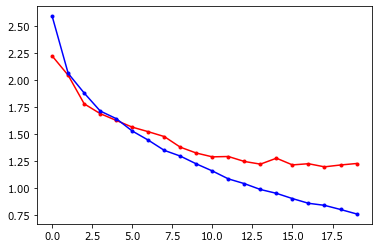

In [13]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

No handles with labels found to put in legend.


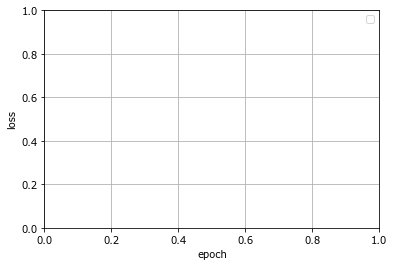

In [14]:
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()